# IS362 - Week 8 Assignment
Michael Hernandez

# 1. Load the data in the (yellow highlighted) Data Folder in the file auto-mpg.data into a pandas DataFrame. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
%matplotlib inline

mpg_data = pd.read_csv('auto-mpg.data', header=None, delim_whitespace=True)

# 2. Review the data and the provided data set description. 

In [2]:
mpg_data.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# 3. Use the attribute information provided in auto-mpg.names to name your pandas DataFrame columns. 

I found the attribute information in section 7 of the auto-mpg.names file:

7. Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

In [3]:
mpg_headers = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
mpg_data.columns = mpg_headers

In [4]:
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# 4. Some of the horsepower data is marked as missing with a ‘?’.  You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric. 

I opened up the datafile and found that the ? values are in the horsepower column exclusively - this first search proves that point. The function does a search through each row for the escaped ? value, and sets display to true if it is True.
Then I converted the ? to Pandas NaN value in place.  Finally I converted that NaN to 0 to make it a numeric value.

In [5]:
mpg_data[mpg_data.apply(lambda row: row.astype(str).str.contains('\?', case=False).any(), axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [6]:
mpg_data = mpg_data.replace('?', np.nan)

In [7]:
mpg_data.loc[mpg_data['horsepower'].str.contains('\?', na=True)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [8]:
mpg_data = mpg_data.replace(np.nan, 0)
mpg_data.loc[mpg_data['horsepower'] == 0]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,0,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,0,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,0,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,0,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,0,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,0,3035.0,20.5,82,1,amc concord dl


In [9]:
mpg_data['horsepower'] = pd.to_numeric(mpg_data['horsepower'],errors='coerce')

# 5. The origin column values are 1, 2, and 3.  Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’ 

Here I use the pandas replace function with a dictionary to replace the three values in our origin column, I then take a random sample to see if the replace was successful

In [10]:
mpg_data = mpg_data.replace({'origin' : { 1 : 'USA', 2 : 'Europe', 3 : 'Asia' }})
mpg_data.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
358,31.6,4,120.0,74.0,2635.0,18.3,81,Asia,mazda 626
198,33.0,4,91.0,53.0,1795.0,17.4,76,Asia,honda civic
226,20.5,6,231.0,105.0,3425.0,16.9,77,USA,buick skylark
209,19.0,4,120.0,88.0,3270.0,21.9,76,Europe,peugeot 504
136,16.0,8,302.0,140.0,4141.0,14.0,74,USA,ford gran torino
288,18.2,8,318.0,135.0,3830.0,15.2,79,USA,dodge st. regis
257,19.4,6,232.0,90.0,3210.0,17.2,78,USA,amc concord
246,32.8,4,78.0,52.0,1985.0,19.4,78,Asia,mazda glc deluxe
50,28.0,4,116.0,90.0,2123.0,14.0,71,Europe,opel 1900
188,16.0,8,318.0,150.0,4190.0,13.0,76,USA,dodge coronet brougham


# 6. Create a bar chart that shows the distribution for cylinders. 

The data should look like the following table:

| origin | cylinders | count |
|--------|-----------|-------|
| usa    | 4         | 12    |
|-        | 6         | 51    |
|-         | 8         | 31    |
| Asia   | 3         | 12    |
|-         | 4         | 12    |
|-         | 8         | 31    |
| Europe | 2         | 13    |
|-         | 4         | 30    |
|-         | 8         | 50    |

So I can feed that data into a graph for visualization. The pandas size() aggregation function seems to do just that for us.

In [11]:
bar_graph_data = mpg_data.groupby(['origin','cylinders']).size()
bar_graph_data

origin  cylinders
Asia    3              4
        4             69
        6              6
Europe  4             63
        5              3
        6              4
USA     4             72
        6             74
        8            103
dtype: int64

Now we are ready to plot the bar chart:

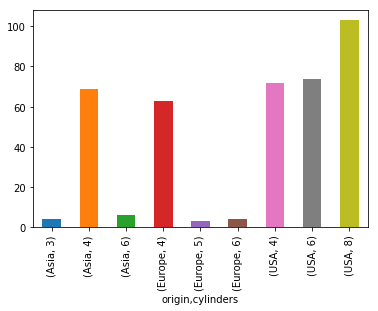

In [12]:
sp = bar_graph_data.plot(kind='bar')

# 7. Create a scatterplot that shows the relationship between horsepower and weight.

For this we can use seaborn to plot our scatterchart using the data in mpg_data columns horsepower and weight:

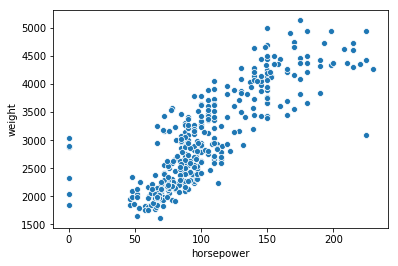

In [13]:
sb.scatterplot(x=mpg_data.horsepower, y=mpg_data.weight)

# 8. Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about the distribution of one of the variables, or the relationship between two (or more!) of the variables in the “Auto MPG” dataset

# What are the average mpg of cars from each region?

For this calculation, I wanted to group by origin, then take the mean() values in those groupings.  
Aggregation resets the index to be the origin field, in order to use the origin field in the graph I needed to reset the index of the data frame:

In [14]:
average_mpg = mpg_data.groupby(['origin']).mean()
average_mpg.reset_index(level=0, inplace=True)
average_mpg

,origin,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,Asia,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038
1,Europe,27.891429,4.157143,109.142857,78.257143,2423.300000,16.787143,75.814286
2,USA,20.083534,6.248996,245.901606,117.136546,3361.931727,15.033735,75.610442


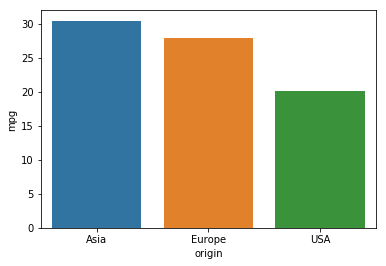

In [15]:
sb.barplot(x=average_mpg.origin, y=average_mpg.mpg)

# Cars from Asia have the highest MPG, followed by Europe, then USA.